In [1]:
%matplotlib inline
import torch
import numpy as np
import sys
sys.path.append("..")
import d2lzh_pytorch as d2l

In [2]:
n_train,n_test,true_w,true_b=100,100,[1.2,-3.4,5.6],5
features=torch.randn((n_train+n_test,1))
poly_features=torch.cat((features,torch.pow(features,2),torch.pow(features,3)),1)
labels=(true_w[0]*poly_features[:,0]+true_w[1]*poly_features[:,1]+true_w[2]*poly_features[:,2]+
       true_b)
labels+=torch.tensor(np.random.normal(0,0.01,size=labels.size()),dtype=torch.float)


In [3]:
features[0:2],poly_features[0:2],labels[0:2]
print(poly_features.shape[-1])

3


In [4]:
def semilogy(x_vals,y_vals,x_label,y_label,x2_vals=None,y2_vals=None,
            legend=None,figsize=(3.5,2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals,y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals,y2_vals,linestyle=':')
        d2l.plt.legend(legend)
        

In [9]:
from torch import nn
num_epochs,loss=100,torch.nn.MSELoss()
def fit_and_plot(train_features,test_features,train_labels,test_labels):
    net=torch.nn.Linear(train_features.shape[-1],1)
    batch_size=min(10,train_labels.shape[0])
    dataset=torch.utils.data.TensorDataset(train_features,train_labels)
    train_iter=torch.utils.data.DataLoader(dataset,batch_size,shuffle=True)
    从数据库中每次抽出batch_size个样本，每次都会更新！！
    optimizer=torch.optim.SGD(net.parameters(),lr=0.01)
    train_ls,test_ls=[],[]
    for _ in range(num_epochs):
        for X,y in train_iter:
            l=loss(net(X),y.view(-1,1))
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            
        train_labels=train_labels.view(-1,1)
        test_labels=test_labels.view(-1,1)
        
        train_ls.append(loss(net(train_features),train_labels).item())
        test_ls.append(loss(net(test_features),test_labels).item())
        
    print('final epoch:train loss',train_ls[-1],'test loss',test_ls[-1])
    semilogy(range(1,num_epochs+1),train_ls,'epochs','loss',
            range(1,num_epochs+1),test_ls,['train','test'])
    print('weight:',net.weight.data,
         '\nbias:',net.bias.data)

final epoch:train loss 0.000123519406770356 test loss 0.00012621530913747847
weight: tensor([[ 1.1920, -3.3963,  5.6024]]) 
bias: tensor([4.9956])


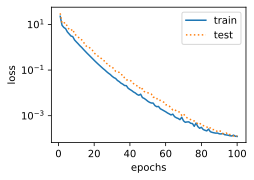

In [10]:
fit_and_plot(poly_features[:n_train,:],poly_features[n_train:,:],
            labels[:n_train],labels[n_train:])


final epoch:train loss 242.11587524414062 test loss 126.1112289428711
weight: tensor([[19.0984]]) 
bias: tensor([-0.2925])


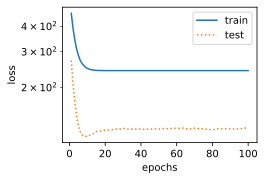

In [12]:
fit_and_plot(features[:n_train,:],features[n_train:,:],labels[:n_train],labels[n_train:])

final epoch:train loss 1.2596501619555056e-08 test loss 20.87603187561035
weight: tensor([[ 1.9122, -0.6614,  4.9757]]) 
bias: tensor([-0.7256])


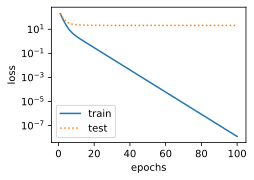

In [13]:
fit_and_plot(poly_features[0:2,:],poly_features[n_train:,:],
            labels[0:2],labels[n_train:])